# Analyse graphique Work In Progress

In [1]:
# import des bibliotheques 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
data_amelie = pd.read_csv("donnee_temp/depense_age.csv")
data_amelie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922350 entries, 0 to 922349
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   annee                                   922350 non-null  int64  
 1   patho_niv1                              922350 non-null  object 
 2   patho_niv2                              783750 non-null  object 
 3   patho_niv3                              669780 non-null  object 
 4   top                                     922350 non-null  object 
 5   dep_niv_1                               922350 non-null  object 
 6   dep_niv_2                               922350 non-null  object 
 7   montant                                 922350 non-null  int64  
 8   nb_traités_pathologie_OK                922350 non-null  float64
 9   nb_traités_autre_patho                  922350 non-null  float64
 10  montant_moy                             9223

In [3]:
# import des données
data_amelie = pd.read_csv("donnee_temp/depense_age.csv",dtype={
    'annee':'uint16'
    ,'patho_niv1':'category'
    ,'patho_niv2':'category'
    ,'patho_niv3':'category'
    ,'top':'category'
    ,'dep_niv_1':'category'
    ,'dep_niv_2':'category'
    ,'montant':'uint64'
    ,'nombre de patients traités pour la pathologie selectionnée':'float64'
    ,'nombre de patient traités pour une autre pathologie mais necessitant des soins du poste':'float64'
    ,'montant_moy':'float64'
    ,'type_somme':'category'
    ,'sexe':'uint8'
    ,'cla_age_5':'category'
    ,'Ntop':'uint32'
    ,'Ntop_total':'uint64'
    ,'pourcentage acte selon la classe d\'age':'float64'
    ,'nombre de patients traités pour la pathologie selectionnée par classe d\'age':'uint32'
    ,'nombre de patient traités pour une autre pathologie mais necessitant des soins du poste par classe d\'age':'uint32'
    ,'montant par classe d\'age':'uint32'
    ,'pop':'int64'
})


In [4]:
data_amelie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922350 entries, 0 to 922349
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   annee                                   922350 non-null  uint16  
 1   patho_niv1                              922350 non-null  category
 2   patho_niv2                              783750 non-null  category
 3   patho_niv3                              669780 non-null  category
 4   top                                     922350 non-null  category
 5   dep_niv_1                               922350 non-null  category
 6   dep_niv_2                               922350 non-null  category
 7   montant                                 922350 non-null  uint64  
 8   nb_traités_pathologie_OK                922350 non-null  float64 
 9   nb_traités_autre_patho                  922350 non-null  float64 
 10  montant_moy                     

In [5]:
# config graphe
sns.set_theme(style="whitegrid")
#plt.style.use("dark_background")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("pastel")
palette = sns.color_palette("pastel").as_hex()

In [6]:
# fonction pour funcformatter

def nombre_en_milliard(nb,pos):
    return format(round(nb/(10e9)),'_').replace("_"," ")

def nombre_en_million(nb,pos):
    return format(round(nb/(10e6)),'_').replace("_"," ")



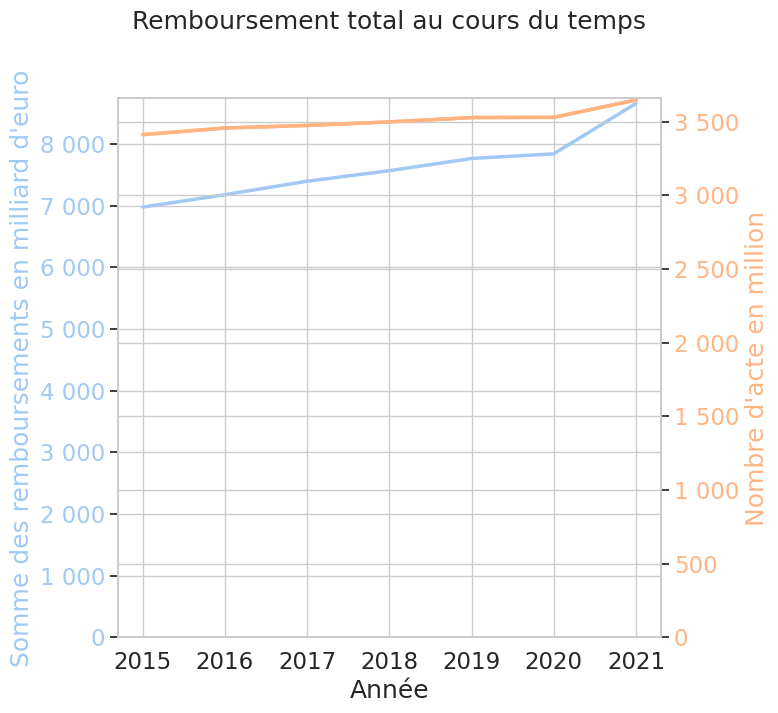

In [7]:
# regoupement des datas pour affichages
data_annee = data_amelie.groupby(by=['annee'],observed=False).agg(montant=('montant','sum')
,montant_moyen=('montant_moy','mean')
,nb_acte=('Ntop','sum')).reset_index()
couleur_axe_1 = 0
couleur_axe_2 = 1

# affichage
fig,ax1 = plt.subplots()
sns.lineplot(ax=ax1,data=data_annee,x='annee',y='montant',color=palette[couleur_axe_1])
fig.set_size_inches(7,7)
ax1.set_title('Remboursement total au cours du temps',pad=50)
ax1.set_xlabel('Année')
ax1.set_ylabel('Somme des remboursements en milliard d\'euro',color=palette[couleur_axe_1])
ax1.tick_params(axis='y', labelcolor=palette[couleur_axe_1])
ax1.yaxis.set_major_formatter(FuncFormatter(nombre_en_milliard))
ax1.set_ylim(0)

ax2 = ax1.twinx()

sns.lineplot(ax=ax2,data=data_annee,x='annee',y='nb_acte',color=palette[couleur_axe_2])
ax2.set_ylabel('Nombre d\'acte en million',color=palette[couleur_axe_2])
ax2.yaxis.set_major_formatter(FuncFormatter(nombre_en_million))
ax2.tick_params(axis='y', labelcolor=palette[couleur_axe_2])
ax2.set_ylim(0)

sns.lineplot(ax=ax2,data=data_annee,x='annee',y='nb_acte',color=palette[couleur_axe_2])

plt.show()

#suppression des données en ram
del data_annee

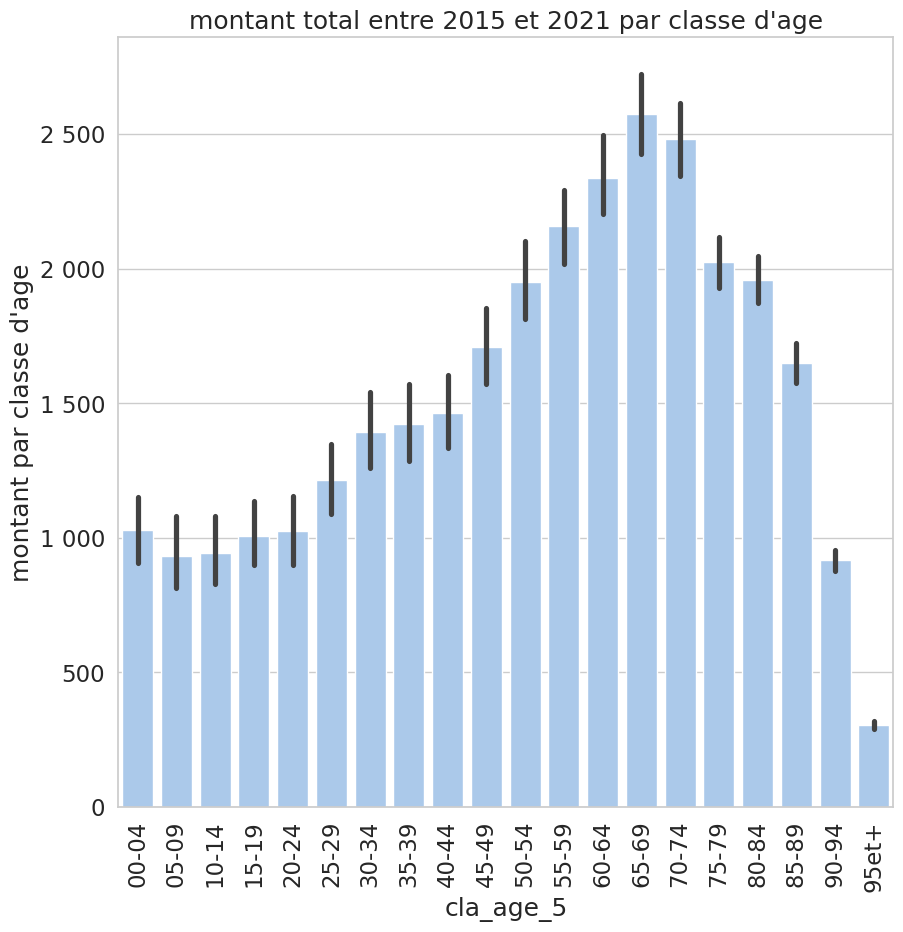

In [8]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(data=data_amelie,x='cla_age_5',y='montant par classe d\'age',ax=ax,estimator='sum')
ax.yaxis.set_major_formatter(FuncFormatter(nombre_en_million))
ax.set_title("montant total entre 2015 et 2021 par classe d'age")

ax.tick_params(axis='x', labelrotation=90)
plt.show()

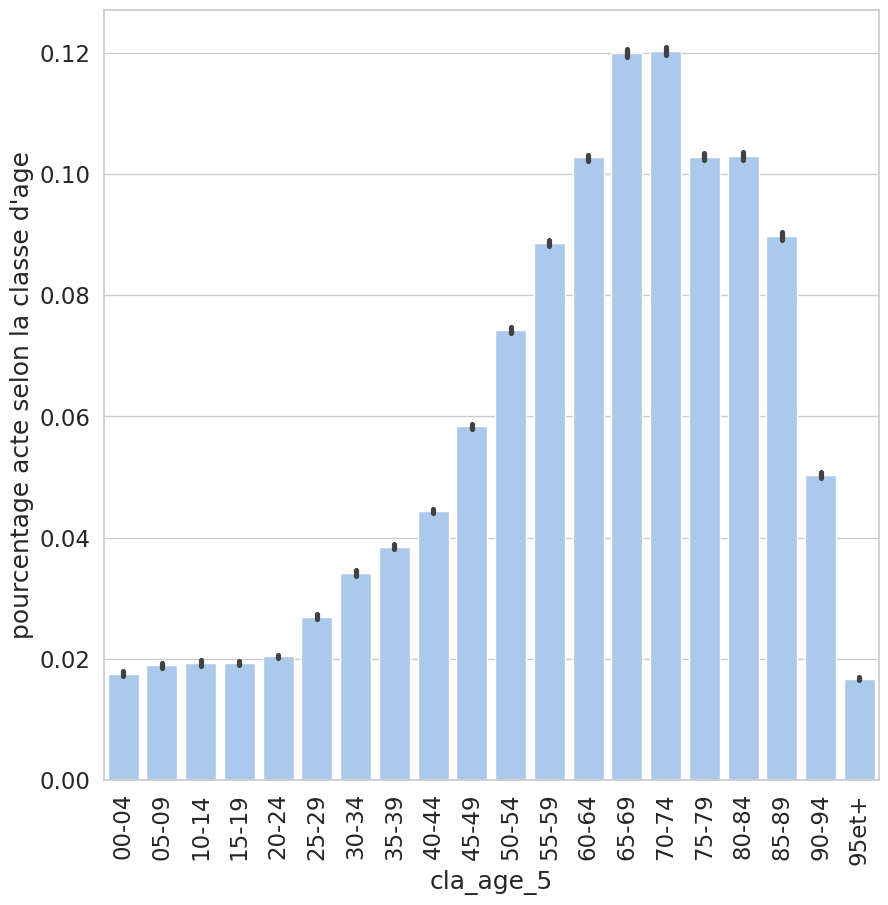

In [9]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(data=data_amelie,x='cla_age_5',y="pourcentage acte selon la classe d'age",ax=ax,estimator='mean')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

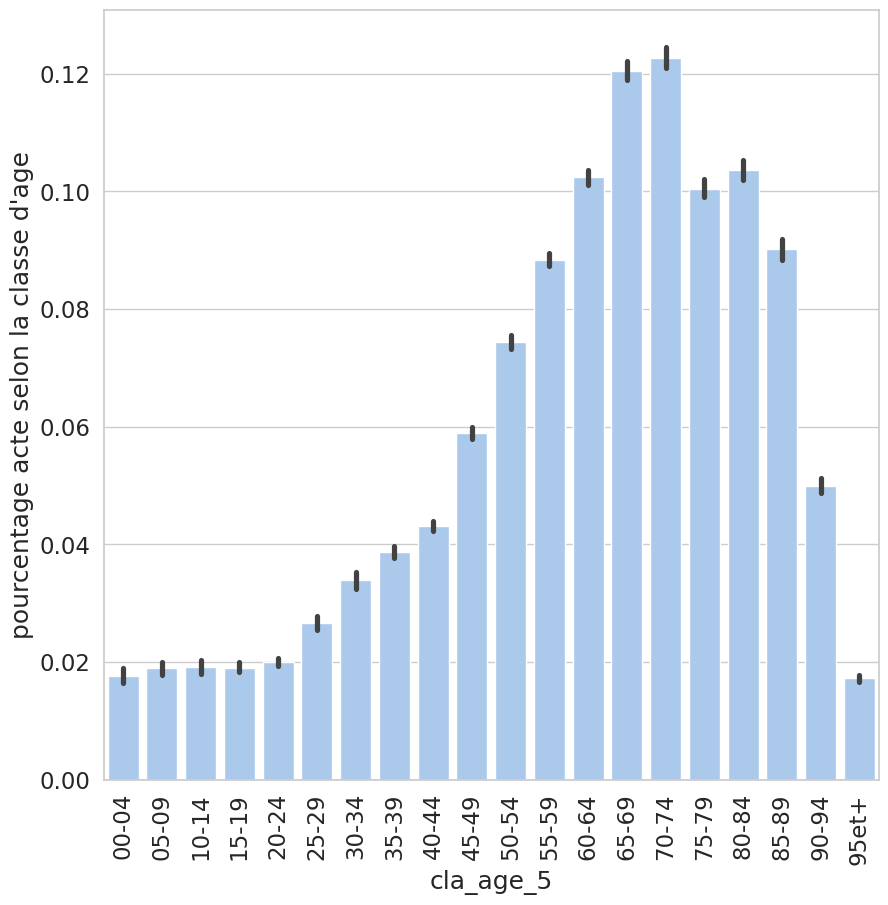

In [10]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(data=data_amelie[data_amelie['annee']==2018],x='cla_age_5',y="pourcentage acte selon la classe d'age",ax=ax,estimator='mean')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

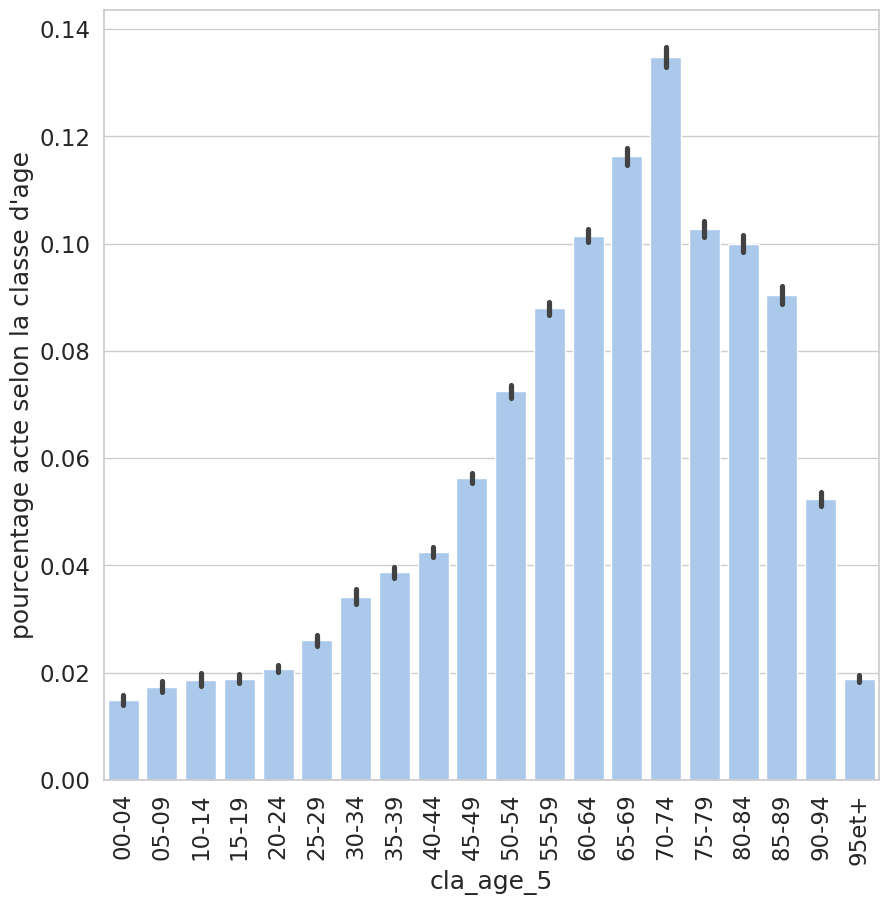

In [11]:
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.barplot(data=data_amelie[data_amelie['annee']==2020],x='cla_age_5',y="pourcentage acte selon la classe d'age",ax=ax,estimator='mean')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

In [12]:
data_amelie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922350 entries, 0 to 922349
Data columns (total 21 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   annee                                   922350 non-null  uint16  
 1   patho_niv1                              922350 non-null  category
 2   patho_niv2                              783750 non-null  category
 3   patho_niv3                              669780 non-null  category
 4   top                                     922350 non-null  category
 5   dep_niv_1                               922350 non-null  category
 6   dep_niv_2                               922350 non-null  category
 7   montant                                 922350 non-null  uint64  
 8   nb_traités_pathologie_OK                922350 non-null  float64 
 9   nb_traités_autre_patho                  922350 non-null  float64 
 10  montant_moy                     